In [1]:
# load packages

# data wrangling 
import pandas as pd
import numpy as np
import itertools

# math packages
import math

# visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab

# python constants
import sys

In [2]:
def loadFreshData():
    c2 = pd.read_csv('c2.txt', sep='  ', header=None)

    # cleaning data by dropping the index column
    c2 = c2.drop([0], axis=1)
    c2 = c2.rename(columns={1:'x1', 2:'x2'})
    
    return c2

In [3]:
c2 = loadFreshData()
c2.head()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,x1,x2
0,13.513730,45.033556
1,15.075595,55.974410
2,19.713162,50.680964
3,15.931429,50.227550
4,14.874820,47.480738


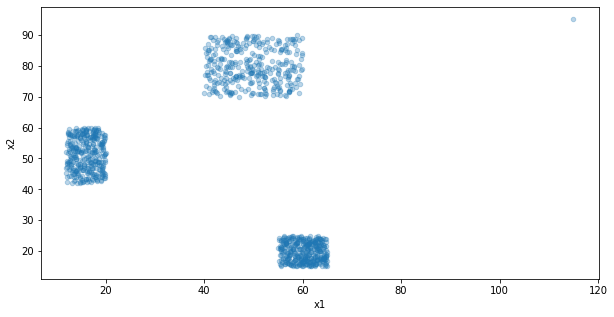

In [4]:
# we should start by looking at a plot of the data
# we should start by looking at a plot of the data
fig, ax = plt.subplots(figsize=(10,5))
c2.plot(kind='scatter', x='x1', y='x2', alpha=0.3, s=20,
        ax=ax)

In [5]:
# now lets work on the Gonzalez Algorithm
# where the first centroid is some random point

In [6]:
# now a helper method to compute euclidean distance
def euclideanDistance(vec1, vec2):
    result = 0
    for i in range(2):
        pairDiff = (vec1[i] - vec2[i])
        result += (pairDiff * pairDiff)

    return math.sqrt(result)

In [7]:
# the main driving method for Gonzalez algorithm
def gonzalezAlgo(data, k):
    
    # initializing an empty list which will hold centers
    centerList = []
    
    # now lets let the first point be our first center
    centerList.append([data[0], 0, 'c1'])
    
    # now we need a list to store all the points' centers
    # as well as their distances to their respective center
    pointList = []
    
    # now we can do a first pass calculating all the distances
    # to our initial center
    
    # we also want to keep track of the max distance from a point
    # to its respective center
    maxD = 0
    
    # loop through all points in the data
    for i in range(len(data)):
        
        # calculate distance from ith point to most recent center
        d = euclideanDistance(data[i], centerList[-1][0])
        
        # add center and its corresponding distance to the list
        pointList.append([d, centerList[-1][2]])
        
        # if the distance between this point and its center 
        # is the maximum distance so far
        if (d > maxD):
            
            #record new max
            maxD = d
            
            # record this points index
            newCenter = i
    
    # this farthest point becomes the next center, c2
    # so add this point to the list of centers
    centerList.append([data[newCenter], newCenter, 'c2'])

    # now we can use a while loop to basically repeat
    # the above procedure, except now we need to compare
    # the distance between points and the new center
    
    # if this distance is less than it was to the previous point
    # then this point gets re-assigned to the new center

    # letting j = the index of the next center
    j = 3
    while (len(centerList) <= k):

        # re-setting the max for this round
        maxD = 0

        # looping through all points in the data
        for i in range(len(data)):

            # calculate the distance from ith data point to most recent center
            d = euclideanDistance(data[i], centerList[-1][0])

            # if distance to new center is less than the distance to the currently assigned center
            if (d < pointList[i][0]):
                
                # assign the most recent center as this points center
                pointList[i][1] = centerList[-1][2]
                
                # assign the distance to the new center to this points distance from its respective center
                pointList[i][0] = d
                
                # check if the new distance is the greatest distance from some point to its respective center
                if (d > maxD):
                    maxD = d
                    newCenter = i
            
            # else, the existing distance from the existing center is greater
            else:
                
                # check if the existing distance from a point to its center is the max
                if (pointList[i][0] > maxD):
                    maxD = pointList[i][0]
                    newCenter = i

        # make a new string of the center
        newCenterString = "c{}".format(j)

        # append new center to list
        centerList.append((data[newCenter], newCenter, newCenterString))

        j += 1
        
        # end of while loop
        
    return centerList[:-1], pointList, maxD

In [8]:
# now a helpter method to append distances and centers to 
# a pandas DataFrame of points

def appendDistanceAndCenter(data, pointList):
    # lets get the distances and centers as two separate series
    data = data.copy()
    distances = []
    centers = []
    for i in range(len(pointList)):
        distances.append(pointList[i][0])
        centers.append(int(pointList[i][1][-1]))
        
    data['distanceToCenter'] = distances
    data['center'] = centers
    
    return data

In [9]:
# calculating the 3-mean cost
def threeMeanCost(pointList):
    
    sumResult = 0
    cardinalityCount = 0
    for pointCost in pointList:
        d = pointCost[0]
        sumResult += (d * d)
        cardinalityCount += 1
        
    sumResult = sumResult / cardinalityCount
    
    return math.sqrt(sumResult)

In [10]:
# now a helper method to get a Pandas DataFrame of centers only
def getCentersDataFrame(data):   
    center_df = data[data.distanceToCenter < 0.000000001].drop(['distanceToCenter', 'center'], axis=1)
#     tmp = center_df.iloc[1].copy()
#     center_df.iloc[1] = center_df.iloc[2]
#     center_df.iloc[2] = tmp
    return center_df

In [11]:
# now a helper method to make the cluster plots
def clusterPlot(df, centers_df, title):
    
    # we should start by looking at a plot of the data
    fig, ax = plt.subplots(figsize=(10,5))

    # colors = ['red','green','blue','purple', 'grey']
    colors = ['red', 'green', 'blue']

    df.plot(kind='scatter', x='x1', y='x2', c='center', alpha=.3, s=20,
            cmap=pylab.mpl.colors.ListedColormap(colors), ax=ax)

    cNum = 0
    for k, v in centers_df.iterrows():
        cNum += 1
        ax.annotate('c{}'.format(cNum), v,
                    xytext=(0,0), textcoords='offset points',
                    family='sans-serif', fontsize=14, color='k')

    plt.title(title)
    plt.show()

In [12]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


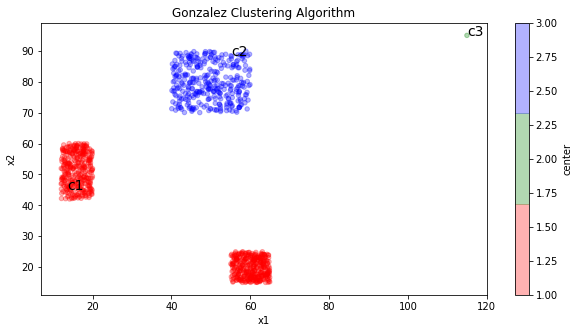

In [13]:
cL, pL, g_3CenterCost = gonzalezAlgo(c2.to_numpy(), 3)
c2G = appendDistanceAndCenter(c2, pL)
centersG = getCentersDataFrame(c2G)
clusterPlot(c2G, centersG, "Gonzalez Clustering Algorithm")

In [14]:
print("The 3-center cost for Gonzalez Algo: {}".format(g_3CenterCost))
print("The 3-mean cost for Gonzalez Algo: {}".format(threeMeanCost(pL)))

The 3-center cost for Gonzalez Algo: 59.46920197567593
The 3-mean cost for Gonzalez Algo: 32.621576568155625


In [15]:
# now lets work on the k++ means algorithm!

In [16]:
# data = c2.to_numpy()
#c2.head()

In [17]:
# used to compare the randomly drawn floats to the cumulative sums to determine the next c_j
from bisect import bisect_right

# a helper method from bisect
'''
https://docs.python.org/2/library/bisect.html
'''

def find_gt(a, x):
    'Find leftmost value greater than x'
    i = bisect_right(a, x)
    if i != len(a):
        return i
    raise ValueError

In [18]:
def kMeansPlusPlusAlgo(data, k):
    
    # initializing an empty list which will hold centers
    centerList = []
    
    # now lets let the first point be our first center
    centerList.append((data[0], 0, 'c1'))
    
    # now we need a list to store all the points' centers
    # as well as their distances to their respective center
    pointList = []
    
    # now we can do a first pass calculating all the distances
    # to our initial center
    
    # we also want to keep track of the max distance from a point
    # to its respective center
    maxD = 0
    
    # also a variable to track the cumulative sum of squared distances
    cumSum = 0
    cumSumList = []
    
    # loop through all points in the data
    for i in range(len(data)):
        
        # calculate distance from ith point to most recent center
        d = euclideanDistance(data[i], centerList[-1][0])
        
        # add center and its corresponding distance to the list
        pointList.append([d, centerList[-1][2]])
        
        # calculate d squared
        d_sq = d * d
        
        # increment the cumulative sum
        cumSum += d_sq
        cumSumList.append(cumSum)
        
    # now standardize the list from 0 to 1 by dividing by the last element
    # which is the total sum
    for i in range(len(cumSumList)):
        
        cumSumList[i] = cumSumList[i] / cumSumList[-1]
            
    # now we can randomly draw the next center
    randomIndex = find_gt(cumSumList, np.random.random_sample())

    # now lets let the first point be our first center
    centerList.append([data[randomIndex], randomIndex, 'c2'])
        
    # if the distance between this point and its center 
    # is the maximum distance so far
    if (d > maxD):
        maxD = d

    # now we can use a while loop to basically repeat
    # the above procedure, except now we need to compare
    # the distance between points and the new center
    
    # these new distances then derive the new cdf
    # and we once again randomly draw the next center

    # letting j = the index of the next center
    j = 3
    while (len(centerList) <= k):

        # re-setting the max for this round
        maxD = 0
        
        # also a variable to track the cumulative sum of squared distances
        cumSum = 0
        cumSumList = []

        # looping through all points in the data
        for i in range(len(data)):

            # calculate the distance from ith data point to most recent center
            d = euclideanDistance(data[i], centerList[-1][0])

            # if distance to new center is less than the distance to the currently assigned center
            if (d < pointList[i][0]):
                
                # assign the most recent center as this points center
                pointList[i][1] = centerList[-1][2]
                
                # assign the distance to the new center to this points distance from its respective center
                pointList[i][0] = d
                
                # check if the new distance is the greatest distance from some point to its respective center
                if (d > maxD):
                    maxD = d

            # else, the existing distance from the existing center is greater
            else:
                
                # check if the existing distance from a point to its center is the max
                if (pointList[i][0] > maxD):
                    maxD = pointList[i][0]
                    
            # calculate d squared
            d_sq = d * d
        
            # increment the cumulative sum
            cumSum += d_sq
            cumSumList.append(cumSum)
        
        # now standardize the list from 0 to 1 by dividing by the last element
        # which is the total sum
        for i in range(len(cumSumList)):
        
            cumSumList[i] = cumSumList[i] / cumSumList[-1]
            
        # now we can randomly draw the next center
        randomIndex = find_gt(cumSumList, np.random.random_sample())

        # make a new string of the center
        newCenterString = "c{}".format(j)

        # append new center to list
        centerList.append((data[randomIndex], randomIndex, newCenterString))

        j += 1
        
        # end of while loop
        
    return centerList[:-1], pointList, maxD

In [19]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


3-Center cost is 76.32216194214548
3-Means cost is 9.788682371719819


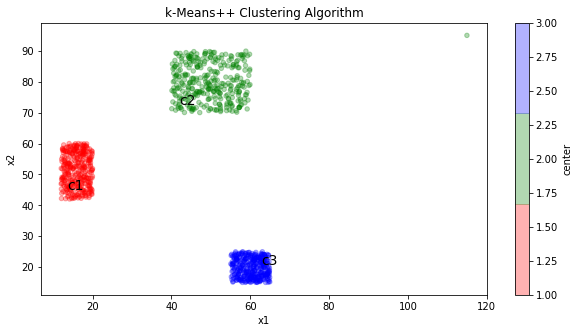

In [20]:
cL2, pL2, dMax2 = kMeansPlusPlusAlgo(c2.to_numpy(), 3)
print("3-Center cost is {}".format(dMax2))
print("3-Means cost is {}".format(threeMeanCost(pL2)))

c2KMeans = appendDistanceAndCenter(c2.copy(), pL2)
centersKMeans = getCentersDataFrame(c2KMeans)
clusterPlot(c2KMeans, centersKMeans, "k-Means++ Clustering Algorithm")

In [21]:
cL2

[(array([13.51372985, 45.03355641]), 0, 'c1'),
 [array([42.01386787, 72.68191497]), 630, 'c2'],
 (array([62.78074285, 20.62993316]), 841, 'c3')]

In [22]:
# now lets re run the experiment multiple times to get a distribution of 3 means cost

def runExperiment(data, n):
    
    costList = []

    for i in range(n):
        cL, pL, dMax = kMeansPlusPlusAlgo(data, 3)
        costList.append(threeMeanCost(pL))

    costList.sort()

    runningSum = 0
    runningSumList = []

    for j in range(len(costList)):
        runningSum += costList[j]
        runningSumList.append(runningSum)

    # now standardize
    for k in range(len(runningSumList)):
        runningSumList[k] = runningSumList[k] / runningSumList[-1]
        
    return costList, runningSumList

In [23]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [24]:
costList, runningSumList = runExperiment(c2.to_numpy(), 100)

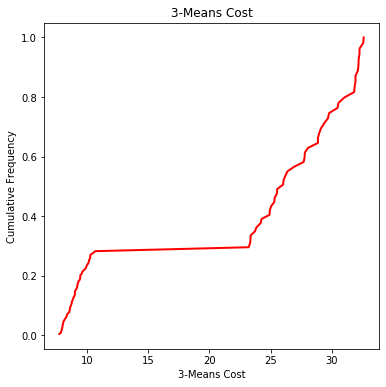

In [25]:
plt.figure(figsize=(6,6))

plt.plot(costList, runningSumList, 'r', lw=2.0)

plt.grid(False)

plt.xlabel("3-Means Cost")
plt.ylabel("Cumulative Frequency")
plt.title("3-Means Cost")

plt.show()

In [26]:
# now lets work on loyd's algorithm

In [27]:
def mapPointsToCenters(data, centerList, pointList):
    
    for i in range(len(pointList)):
        
        for j in range(len(centerList)):
            
            # calculate distance from ith point to most recent center
            d = euclideanDistance(data[i], centerList[j][0])
            
            if (d < pointList[i][0]):
                
                # assign the most recent center as this points center
                pointList[i][1] = centerList[j][2]
                
                # assign the distance to the new center to this points distance from its respective center
                pointList[i][0] = d
    
    return pointList

In [28]:
def calculateClusterAverage(df):
    
    agg_df = df.groupby('center')['x1', 'x2'].mean()
    
    xAvgs = agg_df.x1
    yAvgs = agg_df.x2
    
    result = []
    
    i = 1
    for _ in range(len(agg_df)):
        xMean = xAvgs[i]
        yMean = yAvgs[i]
        result.append((xMean, yMean, "c{}".format(i)))
        i += 1
        
    return result

In [29]:
def appendCenterList(centerList, meanList):
    
    for i in range(len(centerList)):
        for j in range(len(meanList)):
            if centerList[i][2] == meanList[j][2]:
                centerList[i][0][0] = meanList[j][0]
                centerList[i][0][1] = meanList[j][1]
            
    return centerList

In [30]:
def loydsAlgo(df, centerList, pointList, loopCount):
    
    data = df.to_numpy()
    
    for _ in range(loopCount):

        # now given the distances of every point to its assigned center
        # we can calculate the average point for each cluster
        meanList = calculateClusterAverage(df)
        
#         print(meanList)

        # now having a list of average points for each cluster
        # we can make these average points our new centers\
        
#         print("Before")
#         print(centerList)
#         print("\n")
        centerList = appendCenterList(centerList, meanList)
#         print("After")
#         print(centerList)
#         print("\n")
        
        # map all points to their centers and calculate distances to these assigned centers
        pointList = mapPointsToCenters(data, centerList, pointList)
        
        df = appendDistanceAndCenter(df, pointList)
    
    return centerList, pointList

In [31]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [32]:
c2.head()

,x1,x2
0,13.513730,45.033556
1,15.075595,55.974410
2,19.713162,50.680964
3,15.931429,50.227550
4,14.874820,47.480738


Prior 3 mean Cost: 32.621576568155625
Post Loyd 3 mean Cost: 17.014061554856752


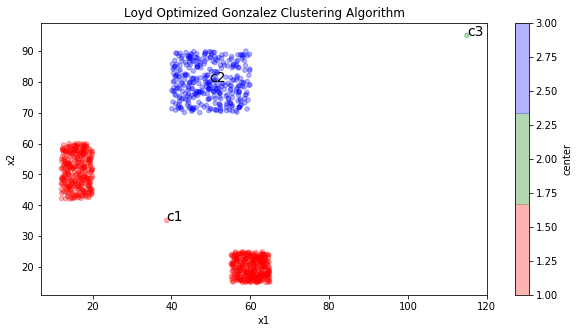

In [33]:
# now lets see how loyd's algorithm optimizes the gonzalez clustering algorithm
cL, pL, g_3CenterCost = gonzalezAlgo(c2.to_numpy(), 3)
print("Prior 3 mean Cost: {}".format(threeMeanCost(pL)))
lg_centerList, lg_pointList = loydsAlgo(c2G.copy(), cL, pL, 20)
print("Post Loyd 3 mean Cost: {}".format(threeMeanCost(pL)))

c2_LG = appendDistanceAndCenter(c2, pL)
centers_LG = getCentersDataFrame(c2_LG)
clusterPlot(c2_LG, centers_LG, "Loyd Optimized Gonzalez Clustering Algorithm")

In [34]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [35]:
# now lets see how loyds algorithm optimizez clustering
# when the first 3 points are chosen as centers
c2.head()

,x1,x2
0,13.513730,45.033556
1,15.075595,55.974410
2,19.713162,50.680964
3,15.931429,50.227550
4,14.874820,47.480738


In [36]:
# creating a makeshift list of centers to interact with our API
exp_cL = []

exp_data = c2.to_numpy()

for i in range(len(exp_data[:3])):
    exp_cL.append((exp_data[i], i, "c{}".format(i+1)))
    
# now making some experiment point list

exp_pL = []
j=0
for j in range(len(exp_data)):
    minD = 999999999
    
    # compare the jth piont to each center
    for k in range(len(exp_cL)):
        
        d = euclideanDistance(exp_data[j], exp_cL[k][0])
        
        # if this is the smallest, record information about this center
        if (d < minD):
            minD = d
            center = exp_cL[k][2]
            
    # after comparing each center, make record for this point
    exp_pL.append([d, center])

In [37]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


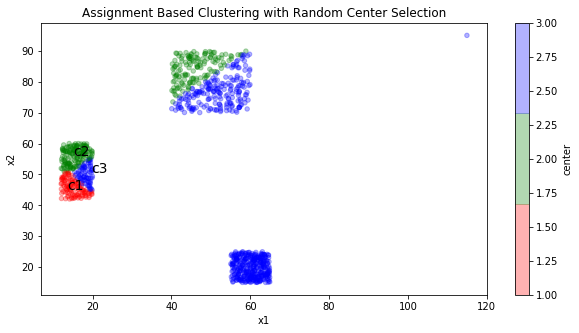

In [38]:
# now we have the inputs required by the API
c2RandPrior = appendDistanceAndCenter(c2, exp_pL)

# making a fake a center data frame
xvals = []
yvals = []

for i in range(len(exp_cL)):
    xvals.append(exp_cL[i][0][0])
    yvals.append(exp_cL[i][0][1])
    
centersRandPrior = pd.DataFrame({'x1':xvals, 'x2':yvals})
clusterPlot(c2RandPrior, centersRandPrior, "Assignment Based Clustering with Random Center Selection")

In [39]:
c2 = loadFreshData()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Prior 3 mean Cost: 38.980746590807904
Post Loyd 3 mean Cost: 10.327827555754928


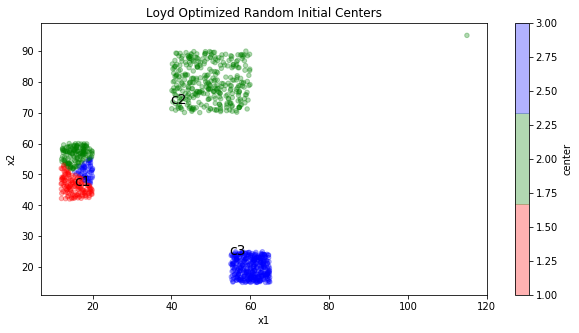

In [40]:
# now lets see how loyd's algorithm optimizes the gonzalez clustering algorithm
print("Prior 3 mean Cost: {}".format(threeMeanCost(exp_pL)))
rand_centerList, rand_pointList = loydsAlgo(c2RandPrior.copy(), exp_cL, exp_pL, 20)
print("Post Loyd 3 mean Cost: {}".format(threeMeanCost(exp_pL)))

c2_Rand = appendDistanceAndCenter(c2, rand_pointList)


# making a fake a center data frame
xvals = []
yvals = []

for i in range(len(exp_cL)):
    xvals.append(exp_cL[i][0][0])
    yvals.append(exp_cL[i][0][1])
    
centers_Rand = pd.DataFrame({'x1':xvals, 'x2':yvals})


clusterPlot(c2_Rand, centers_Rand, "Loyd Optimized Random Initial Centers")

In [41]:
# now lets re run the experiment multiple times to get a distribution of 3 means cost


def runExperiment2(data, n):
    
    costList = []

    for i in range(n):
        cL, pL, dMax = kMeansPlusPlusAlgo(data, 3)
        c2KMeans = appendDistanceAndCenter(c2.copy(), pL)
        loydsAlgo(c2KMeans.copy(), cL, pL, 20)
        costList.append(threeMeanCost(pL))

    costList.sort()

    runningSum = 0
    runningSumList = []

    for j in range(len(costList)):
        runningSum += costList[j]
        runningSumList.append(runningSum)

    # now standardize
    for k in range(len(runningSumList)):
        runningSumList[k] = runningSumList[k] / runningSumList[-1]
        
    return costList, runningSumList

In [42]:
c2 = loadFreshData()
data = c2.to_numpy()

C:\Users\vaisu\.conda\envs\DataMining-env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [43]:
costList, runningSumList = runExperiment2(data, 100)

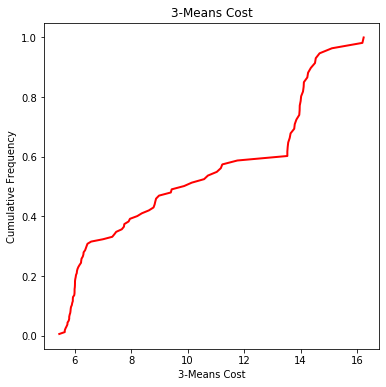

In [44]:
plt.figure(figsize=(6,6))

plt.plot(costList, runningSumList, 'r', lw=2.0)

plt.grid(False)

plt.xlabel("3-Means Cost")
plt.ylabel("Cumulative Frequency")
plt.title("3-Means Cost")

plt.show()